In [25]:
#!pip install retina-face

In [16]:
from retinaface import RetinaFace as rf
import cv2
import matplotlib.pyplot as plt

In [24]:
img = "/home/lucifer/Desktop/IMG_20211126_205718_681.jpg"
cv_2 = cv2.imread(img)


In [25]:
obj = rf.detect_faces(img)

In [26]:
obj

{'face_1': {'score': 0.9995378255844116,
  'facial_area': [552, 463, 1609, 1791],
  'landmarks': {'right_eye': [796.0805, 958.2402],
   'left_eye': [1294.4032, 934.6777],
   'nose': [1027.119, 1209.5198],
   'mouth_right': [849.99005, 1447.4948],
   'mouth_left': [1267.4019, 1426.6863]}}}

In [31]:
for keys in obj.keys():
    identity = obj[keys]
    facial_area = identity["facial_area"]
    cv2.rectangle(cv_2,(facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255,255,0),2)
    

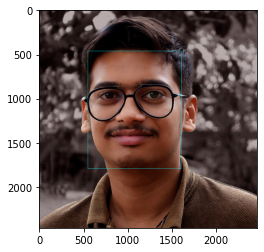

In [33]:
#plt.figure(figsize = (20,20))
plt.imshow(cv_2[:,:,::-1])
plt.show()

In [7]:
#pip install deepface

In [1]:
from deepface import DeepFace as df
import cv2
import matplotlib.pyplot as plt1

In [12]:
img1 = "/home/lucifer/gal_1.jpg"
img2 = "/home/lucifer/gal_3.jpg"
cvimg1 = cv2.imread(img1)
cvimg2 = cv2.imread(img2)

In [13]:
rec_obj= df.verify(img1,img2,model_name="ArcFace",detector_backend="retinaface")

1/1 [==============================] - 0s 14ms/step


In [14]:
rec_obj


{'verified': False,
 'distance': 0.7975722927851232,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine'}

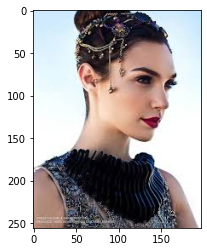

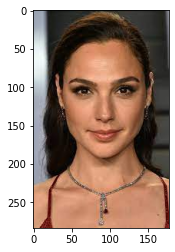

In [15]:
#plt.figure(figsize = (20,20))
plt1.imshow(cvimg1[:,:,::-1])
plt1.show()
plt1.imshow(cvimg2[:,:,::-1])
plt1.show()

In [41]:
from deepface import DeepFace
img_path = "/home/lucifer/gal_2.jpg"
img2 = "/home/lucifer/gal_3.jpg"
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "Dlib", "ArcFace"]
embedding = DeepFace.represent(img_path, model_name = "ArcFace",detector_backend="retinaface")
embedding1 = DeepFace.represent(img2, model_name = "ArcFace",detector_backend="retinaface")

1/1 [==============================] - 0s 18ms/step


In [21]:
print(embedding)
print(embedding1)


[-0.1420639604330063, 0.13089969754219055, 0.15597203373908997, -0.06575625389814377, 0.1910839080810547, -0.015453440137207508, 0.057762742042541504, 0.07493562996387482, 0.034349411725997925, -0.102938711643219, 0.11802073568105698, -0.020049717277288437, -0.14543692767620087, 0.11252538859844208, 0.035945992916822433, 0.06968525052070618, 0.15911661088466644, -0.16638125479221344, 0.04104781150817871, -0.21067415177822113, -0.17055580019950867, 0.16647855937480927, 0.06833157688379288, 0.06542902439832687, -0.07291895896196365, -0.053164172917604446, 0.010167989879846573, 0.040928684175014496, -0.06533907353878021, -0.06770451366901398, 0.010674111545085907, 0.110536128282547, -0.01820356771349907, 0.05657209828495979, 0.0700334683060646, -0.06321540474891663, 0.18154382705688477, -0.051338691264390945, 0.2107611447572708, -0.13143059611320496, 0.08528783917427063, 0.01782374456524849, -0.041261304169893265, -0.09818878024816513, -0.05099661648273468, 0.16325823962688446, 0.01541227

In [26]:
import numpy as np
def cosin_metric(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))



In [42]:
result = cosin_metric(embedding,embedding1)
print(result)

In [2]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

In [3]:
app = FaceAnalysis(providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/lucifer/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/lucifer/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/lucifer/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/lucifer/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/lucifer/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

In [30]:
img = ins_get_image('/home/lucifer/test')
faces = app.get(img)
rimg = app.draw_on(img, faces)

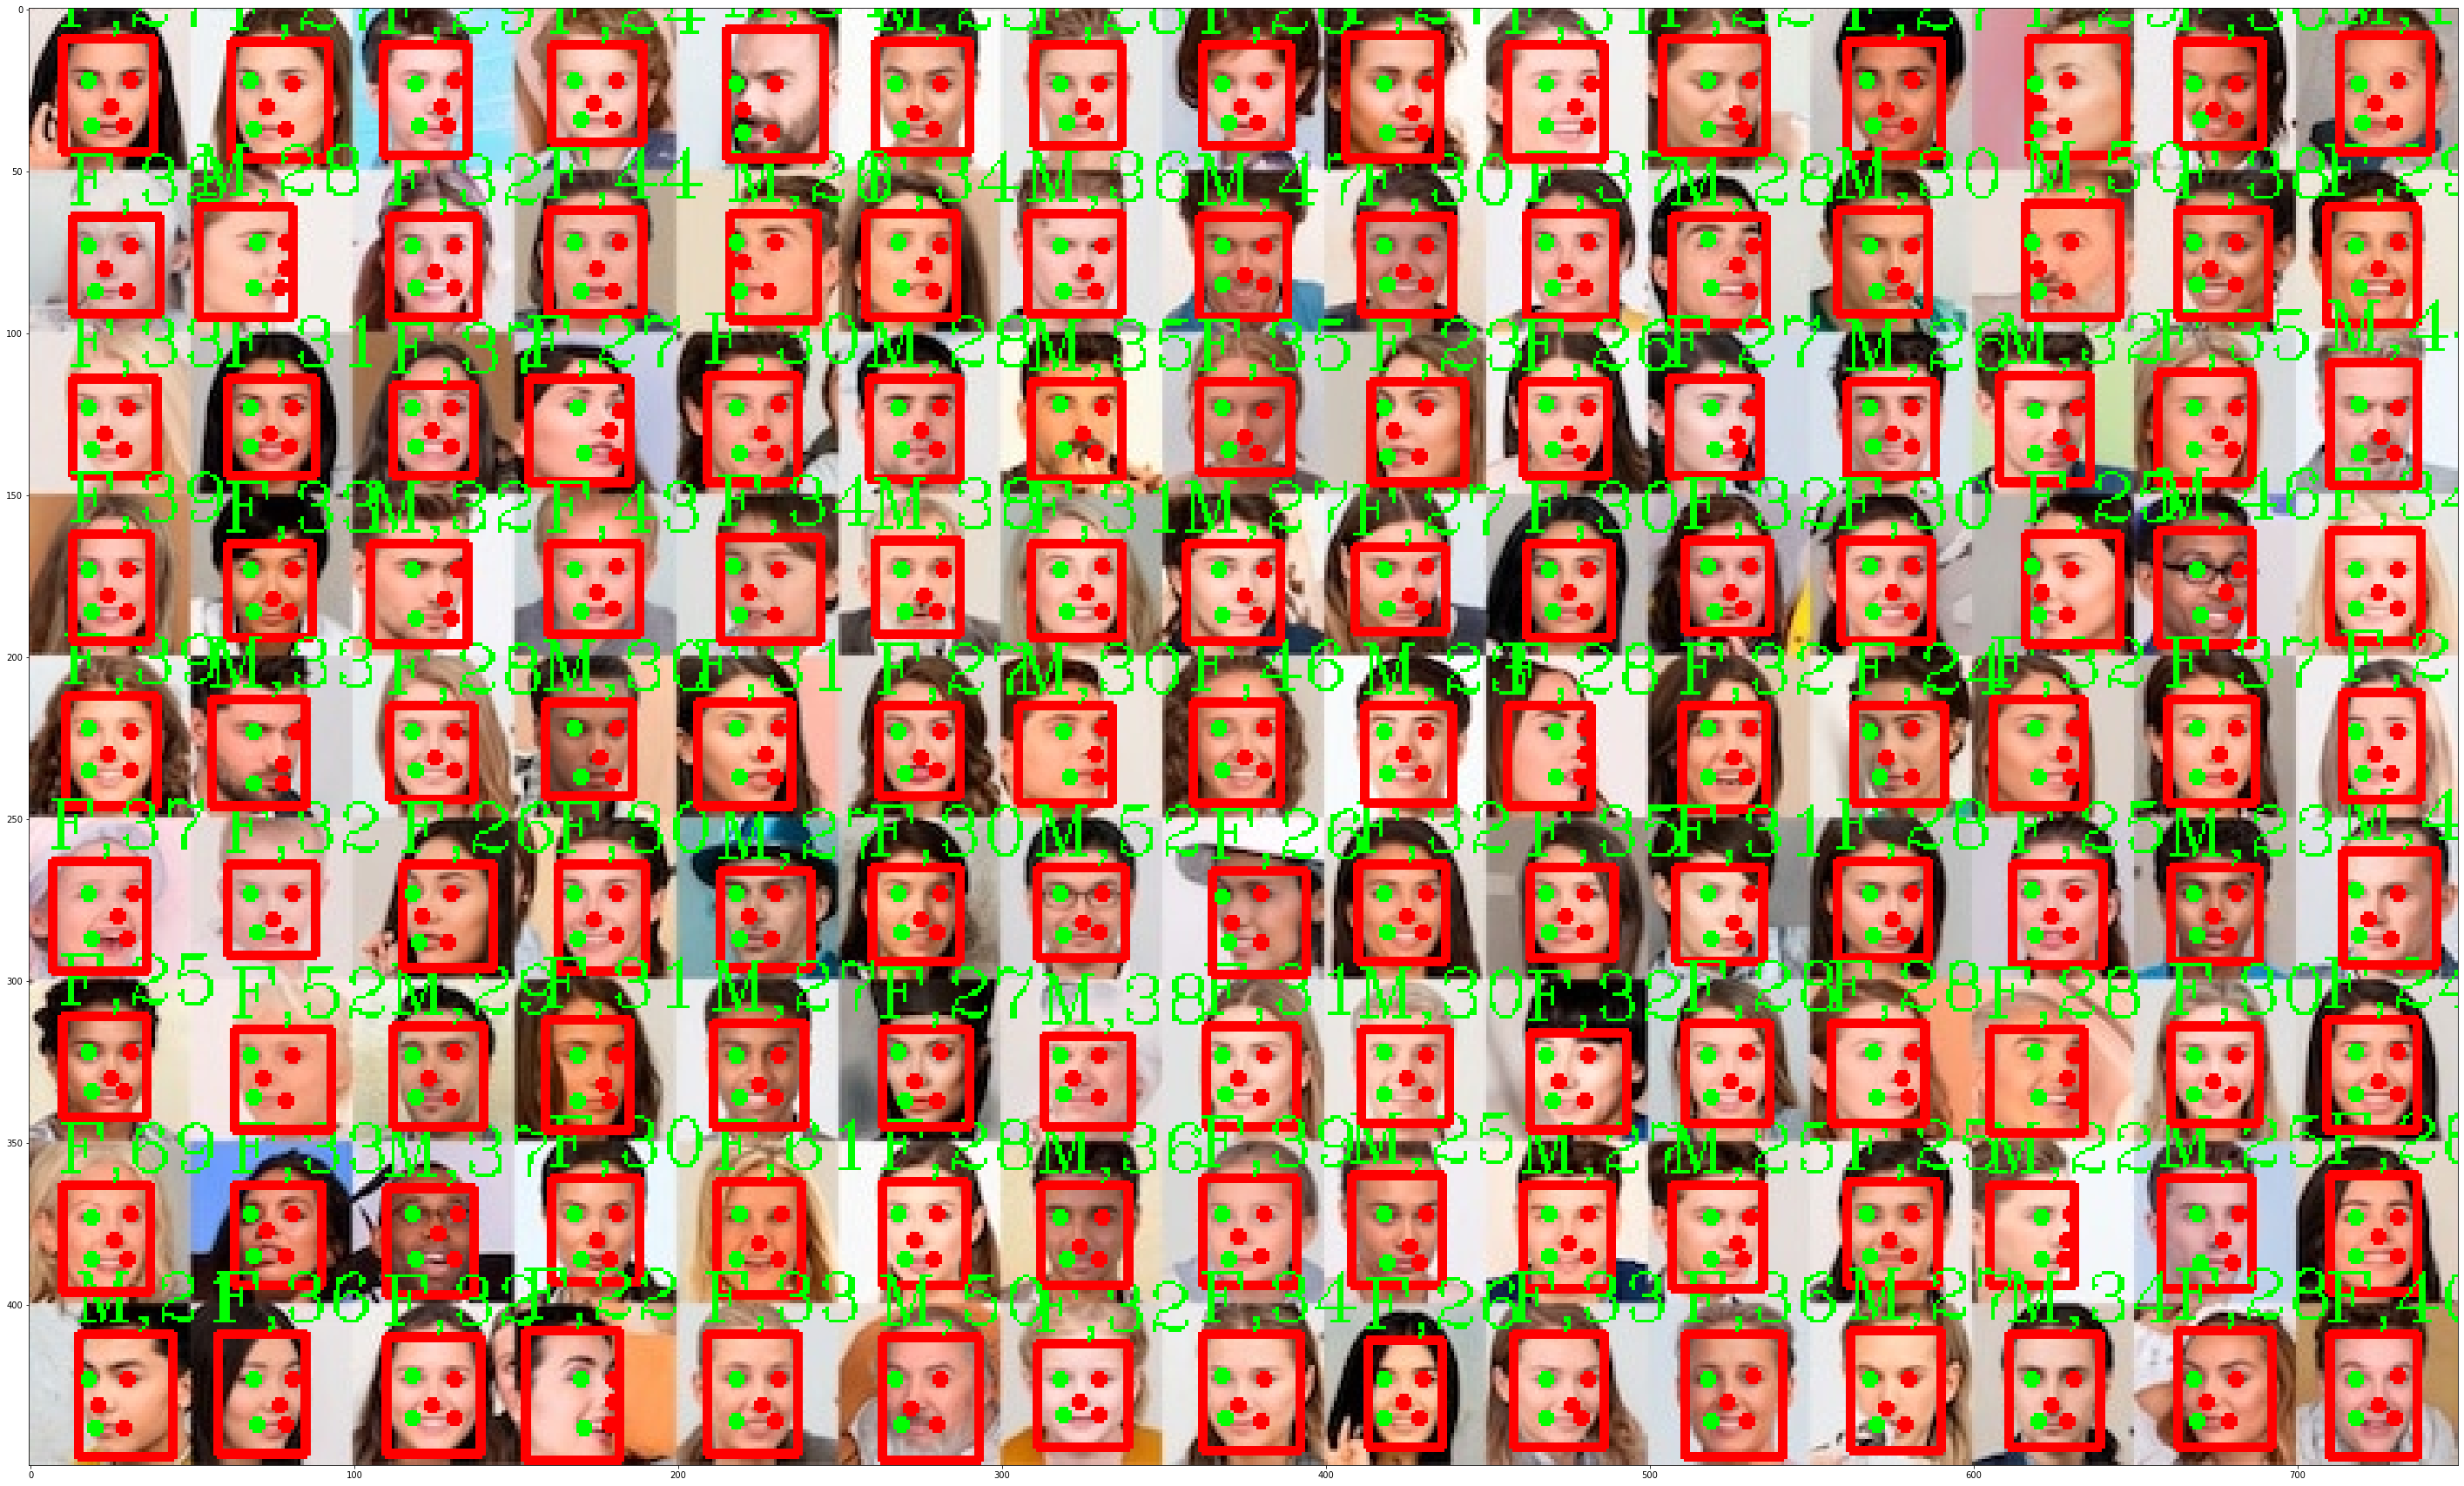

In [29]:
plt.figure(figsize = (50,50))
plt.imshow(rimg[:,:,::-1])

In [24]:
res=app.get(img)
res[0]["bbox"]

array([ 36.94724 ,  40.473843, 148.17009 , 192.05682 ], dtype=float32)